Previous: [Intro](pipeline_intro.ipynb)  ::: Next [pipeline.experiment](pipeline_experiment.ipynb)

# The Big Picture

In [1]:
%pylab inline
import datajoint as dj
from pipeline import mice, experiment, vis, preprocess
pylab.rcParams['figure.figsize'] = (8, 8)  # make figures bigger

Populating the interactive namespace from numpy and matplotlib
DataJoint 0.3.5 (July 21, 2016)
Loading local settings from dj_local_conf.json
Connecting dimitri@datajoint.ninai.org:3306


Below is the outline of processing chain. 

Each schema corresponds to a module in the `pipeline` package *and* the corresponding database on the server.

Each node represents a class in the module *and* a table in the database.

Lines represents dependencies.

* The pipeline starts with the manual information entered in the schemas `mice` and `experiment`.  
* The visual stimulus information is stored in the `vis` schema.  
* The schema `preprocess` extracts traces, infers spikes, and synchronizes two-photon data to the visual stimulus.

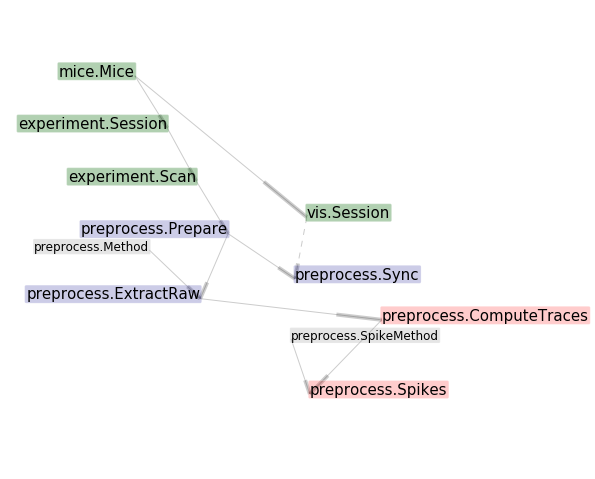

In [2]:
(dj.ERD(preprocess.Sync)-2 + experiment.Session + (dj.ERD(preprocess.Spikes)-3)).draw()

The color code: 
* <span style="background-color: #BBDDBB">Manual</span> (e.g. `experiment.Scan`) is data entered *manually* or by external software.
* <span style="background-color: #BBBBDD">Imported</span> (e.g. `preprocess.Prepare`) is data *imported* from external files by datajoint, requires access to local drives in the lab.
* <span style="background-color: #FFBBBB">Computed</span> (e.g. `preprocess.ComputeTraces`) is *computed* by datajoint from data already in the database without access to external files, can be repopulated in the cloud.
* <span style="background-color: #DDDDDD">Lookup</span> (e.g. `preprocess.Method`) are *lookup* tables containing general information that is not specific to any one experiment.  These often contain processing settings and general  knowledge. 

---
For any table, you can see its definition (attributes, dependencies, comments) by using the `show_definition` method.

In [3]:
experiment.Session().show_definition();

# imaging session
-> mice.Mice
session              : smallint                     # session index for the mouse
---
-> Rig
session_date         : date                         # date
-> Person
-> Anesthesia
-> PMTFilterSet
scan_path            : varchar(255)                 # file path for TIFF stacks
behavior_path = ""   : varchar(255)                 # pupil movies, whisking, locomotion, etc.
craniotomy_notes = "" : varchar(4095)                # free-text notes
session_notes = ""   : varchar(4095)                # free-text notes
session_ts = CURRENT_TIMESTAMP : timestamp                    # automatic



For any tables or relational expressions derived from them, you may see all the attributes using the `heading` attribute.

In [4]:
experiment.Session().heading

# imaging session
animal_id            : int                          # id number
session              : smallint                     # session index for the mouse
---
rig                  : char(4)                      # multiphoton imaging setup
session_date         : date                         # date
username             : char(12)                     # lab member
anesthesia           : char(20)                     # anesthesia short name
pmt_filter_set       : varchar(16)                  # short name of microscope filter set
scan_path            : varchar(255)                 # file path for TIFF stacks
behavior_path=""     : varchar(255)                 # pupil movies, whisking, locomotion, etc.
craniotomy_notes=""  : varchar(4095)                # free-text notes
session_notes=""     : varchar(4095)                # free-text notes
session_ts=CURRENT_TIMESTAMP : timestamp                    # automatic

Note that the attributes above the dividing line `---` comprise the _primary key_, i.e. identifying information used for matching data across different tables.

To preview the contents of a table or of a derived relational expression, simply type it at the IPython prompt.

In [5]:
experiment.Session()

animal_id,session,rig,session_date,username,anesthesia,pmt_filter_set,scan_path,behavior_path,craniotomy_notes,session_notes,session_ts
7588,1,2P3,2016-02-08,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160208,/scratch01/WholeCell/jake/160208,,;;Nestin-GCaMP6s,2016-02-08 15:33:03
7588,2,2P3,2016-02-09,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160209,/scratch01/WholeCell/jake/160209,,;;Nestin-GCaMP6s,2016-02-09 22:31:23
7816,1,2P3,2016-02-10,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160210,/scratch01/WholeCell/jake/160210,,;;Emx1 Cre,2016-02-11 10:51:26
8158,1,2P3,2016-02-14,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160214,/scratch01/WholeCell/jake/160214,,;;Twitch targeted/Emx1,2016-02-14 14:35:58
8341,1,2P3,2016-02-15,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160215,/scratch01/WholeCell/jake/160215,,;;NEstin/GCaMP,2016-02-15 15:08:10
8487,1,2P3,2016-02-26,unknown,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160226,/scratch01/WholeCell/jake/160226,,Emx1/ZtTA/Ai93;;,2016-02-26 17:19:00
8623,1,2P3,2016-02-17,jake,awake,2P3 red-green A,/scratch01/Two-Photon/Jake/160217,/scratch01/WholeCell/jake/160217,,CamKII-tTA/tetO-GCaMP6s;;CamKII-tTA/tetO-GCaMP,2016-02-17 13:05:17


To fetch the contents of a table or a derived relational expression into a numpy record array, use the fetch method.


In [6]:
data = experiment.Session().fetch()

Next: [pipeline.experiment](pipeline_experiment.ipynb)